In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, Flatten, MaxPool2D, Dense, Dropout
from keras.models import Sequential
from keras.metrics import CategoricalAccuracy, CategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.applications import VGG19
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ModelCheckpoint

import cv2

2024-05-01 13:08:16.762970: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-01 13:08:16.763090: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-01 13:08:16.894448: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
img = cv2.imread('/kaggle/input/ipcv-data-human-emotion-detection/IPCV-Dataset 2/Train/Happy/Happy105.jpg')

In [4]:
img.shape

(112, 112, 3)

In [5]:
train_gen = ImageDataGenerator(rescale=1./255)

test_gen = ImageDataGenerator(rescale=1./255)

In [6]:
train_set = train_gen.flow_from_directory(
    '/kaggle/input/ipcv-data-human-emotion-detection/IPCV-Dataset 2/Train',
    target_size=(112, 112),
    color_mode='rgb',
    class_mode='sparse',
    batch_size=32)

test_set = test_gen.flow_from_directory(
    '/kaggle/input/ipcv-data-human-emotion-detection/IPCV-Dataset 2/Test',
    target_size=(112, 112),
    color_mode='rgb',
    class_mode='sparse',
    batch_size=32)

Found 758 images belonging to 4 classes.
Found 149 images belonging to 4 classes.


In [7]:
vgg19_base = VGG19(weights='imagenet', include_top=False, input_shape=(112, 112, 3))

for layer in vgg19_base.layers:
    layer.trainable = False

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
model = Sequential([
    vgg19_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),  
    Dense(4, activation='softmax')
])


In [9]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', mode='min', save_best_only=True, verbose=1)

In [11]:
history = model.fit(
    train_set,
    steps_per_epoch=train_set.samples // train_set.batch_size,
    epochs=100,
    validation_data=test_set,
    validation_steps=test_set.samples // test_set.batch_size,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 3/23 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.2674 - loss: 1.5847

I0000 00:00:1714568918.185562     118 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.3192 - loss: 1.7106
Epoch 1: val_loss improved from inf to 1.01900, saving model to best_model.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 19s 436ms/step - accuracy: 0.3211 - loss: 1.7045 - val_accuracy: 0.5703 - val_loss: 1.0190
Epoch 2/100
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5938 - loss: 1.0523

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss did not improve from 1.01900
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - accuracy: 0.5938 - loss: 1.0523 - val_accuracy: 0.3333 - val_loss: 12.5036
Epoch 3/100
22/23 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6141 - loss: 0.9873
Epoch 3: val_loss improved from 1.01900 to 0.70323, saving model to best_model.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.6167 - loss: 0.9831 - val_accuracy: 0.7422 - val_loss: 0.7032
Epoch 4/100
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.1364 - loss: 13.3539
Epoch 4: val_loss did not improve from 0.70323
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1364 - loss: 13.3539 - val_accuracy: 0.2857 - val_loss: 16.0304
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7369 - loss: 1.5803
Epoch 5: val_loss improved from 0.70323 to 0.50367, saving model to best_model.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.7371 - loss: 1.5758 - val_accuracy: 0.8750 - val_loss: 0.5037
Epoch 6/1

In [15]:
train_loss, train_accuracy = model.evaluate(train_set)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9976 - loss: 0.0075


In [16]:
test_loss, test_accuracy = model.evaluate(test_set)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9466 - loss: 0.5626


In [17]:
train_accuracy = history.history['accuracy']

train_loss = history.history['loss']

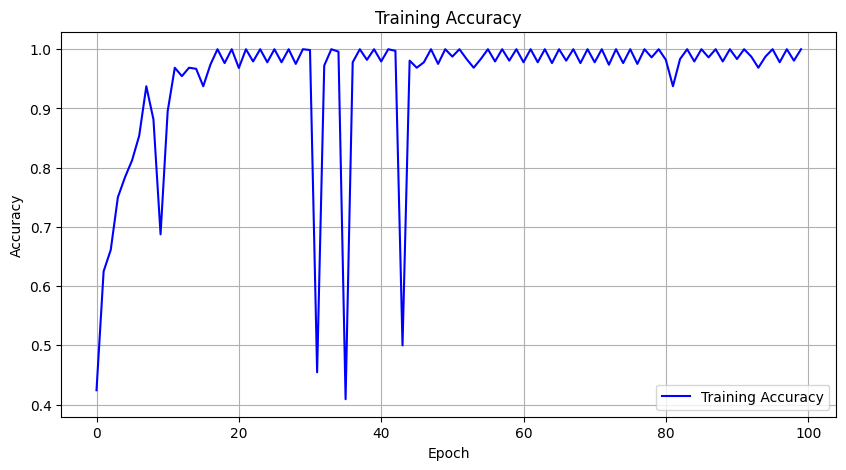

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Training Accuracy', color='blue')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

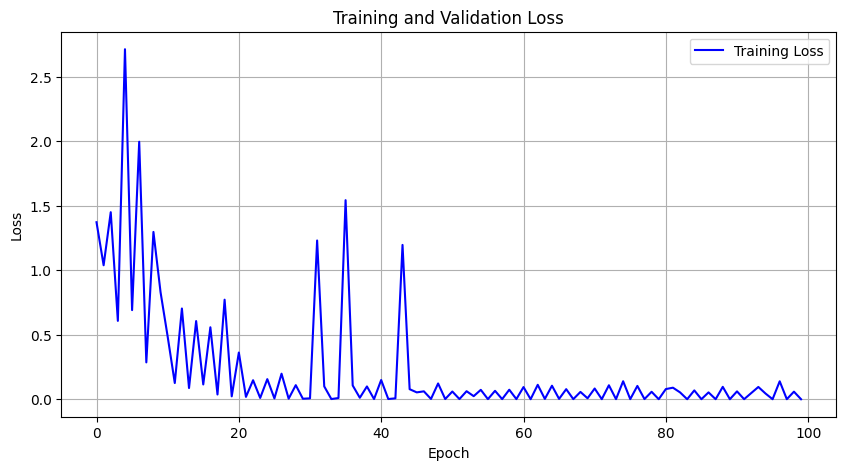

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

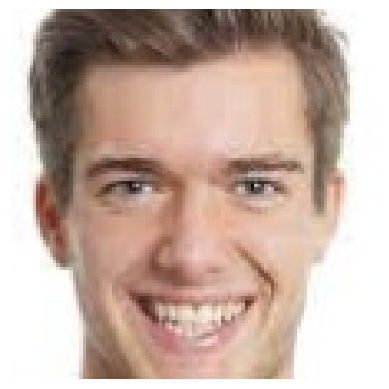

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Emotion: Happy


In [36]:
# Load the new image
new_img = cv2.imread('/kaggle/input/ipcv-data-human-emotion-detection/IPCV-Dataset 2/Test/Happy/Happy194.jpeg')

# Display the loaded image
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
plt.axis('off')  
plt.show()

# Resize the image to match the input shape expected by the model
resized_img = cv2.resize(new_img, (112, 112))

# Reshape the image to match the input shape expected by the model
input_img = np.expand_dims(resized_img, axis=0)

# Normalize the input image
input_img = input_img / 255.0

# Make predictions
predictions = model.predict(input_img)

# Get the predicted class label
predicted_class = np.argmax(predictions)

# Map the predicted class label to the corresponding emotion
class_labels = {'Angry': 0, 'Confused': 1, 'Happy': 2, 'Sad': 3}  
emotion_labels = {v: k for k, v in class_labels.items()}
predicted_emotion = emotion_labels[predicted_class]

print("Predicted Emotion:", predicted_emotion)

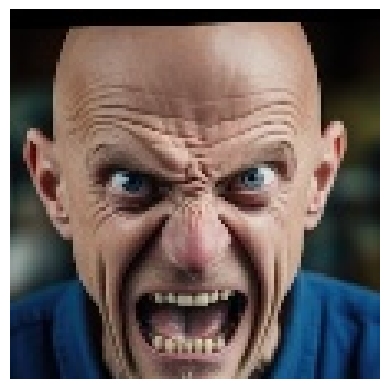

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Emotion: Angry


In [37]:
# Load the new image
new_img = cv2.imread('/kaggle/input/ipcv-data-human-emotion-detection/IPCV-Dataset 2/Test/Angry/Angry152.jpg')

# Display the loaded image
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
plt.axis('off')  
plt.show()

# Resize the image to match the input shape expected by the model
resized_img = cv2.resize(new_img, (112, 112))

# Reshape the image to match the input shape expected by the model
input_img = np.expand_dims(resized_img, axis=0)

# Normalize the input image
input_img = input_img / 255.0

# Make predictions
predictions = model.predict(input_img)

# Get the predicted class label
predicted_class = np.argmax(predictions)

# Map the predicted class label to the corresponding emotion
class_labels = {'Angry': 0, 'Confused': 1, 'Happy': 2, 'Sad': 3}  
emotion_labels = {v: k for k, v in class_labels.items()}
predicted_emotion = emotion_labels[predicted_class]

print("Predicted Emotion:", predicted_emotion)


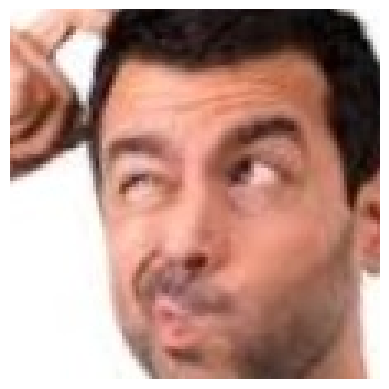

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Emotion: Confused


In [38]:
# Load the new image
new_img = cv2.imread('/kaggle/input/ipcv-data-human-emotion-detection/IPCV-Dataset 2/Test/Confused/Confused179.jpeg')

# Display the loaded image
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
plt.axis('off')  
plt.show()

# Resize the image to match the input shape expected by the model
resized_img = cv2.resize(new_img, (112, 112))

# Reshape the image to match the input shape expected by the model
input_img = np.expand_dims(resized_img, axis=0)

# Normalize the input image
input_img = input_img / 255.0

# Make predictions
predictions = model.predict(input_img)

# Get the predicted class label
predicted_class = np.argmax(predictions)

# Map the predicted class label to the corresponding emotion
class_labels = {'Angry': 0, 'Sad': 1, 'Happy': 2, 'Confused': 3}  
emotion_labels = {v: k for k, v in class_labels.items()}
predicted_emotion = emotion_labels[predicted_class]

print("Predicted Emotion:", predicted_emotion)


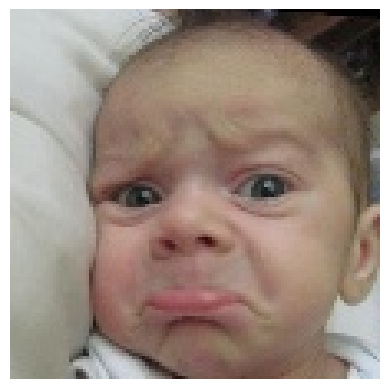

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Emotion: Sad


In [39]:
# Load the new image
new_img = cv2.imread('/kaggle/input/ipcv-data-human-emotion-detection/IPCV-Dataset 2/Test/Sad/Sad160.jpg')

# Display the loaded image
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
plt.axis('off')  
plt.show()

# Resize the image to match the input shape expected by the model
resized_img = cv2.resize(new_img, (112, 112))

# Reshape the image to match the input shape expected by the model
input_img = np.expand_dims(resized_img, axis=0)

# Normalize the input image
input_img = input_img / 255.0

# Make predictions
predictions = model.predict(input_img)

# Get the predicted class label
predicted_class = np.argmax(predictions)

# Map the predicted class label to the corresponding emotion
class_labels = {'Angry': 0, 'Confused': 1, 'Happy': 2, 'Sad': 3}  
emotion_labels = {v: k for k, v in class_labels.items()}
predicted_emotion = emotion_labels[predicted_class]

print("Predicted Emotion:", predicted_emotion)
